In [ ]:
# Self Defined Functions
def euclidean_similarity(u, v):
    return 1/(1+euclidean(u,v))

def cosine_similarity(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

def correlation_similarity(u, v):
    covariance_matrix = np.cov(u, v)
    correlation_coefficient = covariance_matrix[0, 1] / np.sqrt(covariance_matrix[0, 0] * covariance_matrix[1, 1])
    return correlation_coefficient

In [1]:
from scipy.spatial.distance import euclidean, pdist, squareform, cosine, cityblock
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data001 = {}
methods = {1:"HOPE", 2:"LE", 3:"LLE", 4:"DeepWalk", 5:"M-NMF", 7:"node2vec"}
for i in [2,3,1,5,4,7]:
    data001[methods[i]]=np.array(np.loadtxt(f"HeatMap_0.01/{i}_{3}.mean")).reshape(-1, order='C')
data001=pd.DataFrame(data001).transpose()
dists001 = pdist(data001, cosine_similarity)
similarity_matrix001 = pd.DataFrame(squareform(dists001), columns=data001.index, index=data001.index)
#fig, ax = plt.subplots(figsize=(10,8))
#sns.heatmap(similarity_matrix001, annot=True, cmap='viridis')
#plt.savefig('Heatmap_Compare001.png',bbox_inches='tight')

In [3]:
data05 = {}
methods = {1:"HOPE", 2:"LE", 3:"LLE", 4:"DeepWalk", 5:"M-NMF", 7:"node2vec"}
for i in [2,3,1,5,4,7]:
    data05[methods[i]]=np.array(np.loadtxt(f"HeatMap_0.5/{i}_{3}.mean")).reshape(-1, order='C')
data05=pd.DataFrame(data05).transpose()
dists05 = pdist(data05, cosine_similarity)
similarity_matrix05 = pd.DataFrame(squareform(dists05), columns=data05.index, index=data05.index)
#fig, ax = plt.subplots(figsize=(10,8))
#sns.heatmap(similarity_matrix05, annot=True, cmap='viridis')
#plt.savefig('Heatmap_Compare05.png',bbox_inches='tight')

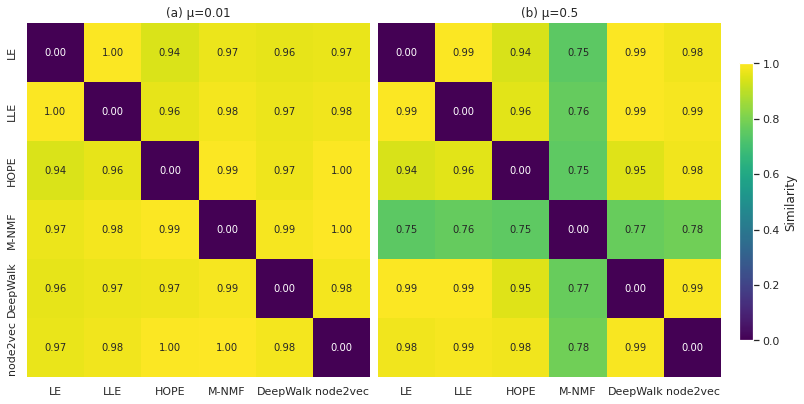

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the common color scale limits
vmin = 0
vmax = 1

# Set the style for Seaborn
sns.set()

# Create subplots with a shared y-axis and x-axis
fig, axs = plt.subplots(1, 2, figsize=(10, 5.5), sharey=True, sharex=True, constrained_layout=True)  # 1 row, 2 columns, share y-axis

# Plot the first heatmap in the first subplot using Seaborn
heatmap1 = sns.heatmap(similarity_matrix001, cmap='viridis', ax=axs[0], annot=True, fmt=".2f", cbar=False, vmin=0, vmax=1)
axs[0].set_title('(a) μ=0.01')
axs[0].set_xlabel('')  # Remove x-axis label

# Plot the second heatmap in the second subplot using Seaborn
heatmap2 = sns.heatmap(similarity_matrix05, cmap='viridis', ax=axs[1], annot=True, fmt=".2f", cbar=False, vmin=0, vmax=1)
axs[1].set_title('(b) μ=0.5')
axs[1].set_xlabel('')  # Remove x-axis label
axs[1].set_ylabel('')


# Create a common color bar for both heatmaps
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(heatmap2.collections[0], cax=cbar_ax)

# Set color bar label
cbar.set_label('Similarity')

# Set a common x-axis label for both subplots
#fig.text(0.52, -0.02, 'Embedding Dimension', ha='center', va='center', fontsize=12)

plt.savefig("Heatmap_Comparison.png",bbox_inches='tight')

# Show the plot
plt.show()